### Import your librares

In [24]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Load your dataset

In [35]:
df = pd.read_csv("seattle_weather.csv")

In [36]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [37]:
df.shape

(25551, 5)

In [38]:
df.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [39]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


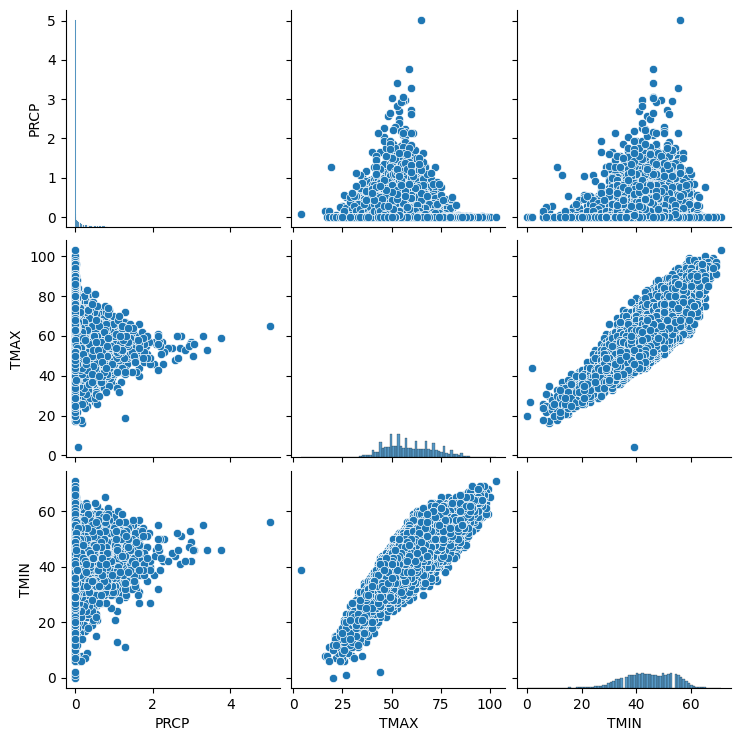

In [40]:
sns.pairplot(df[['PRCP','TMAX','TMIN']]);

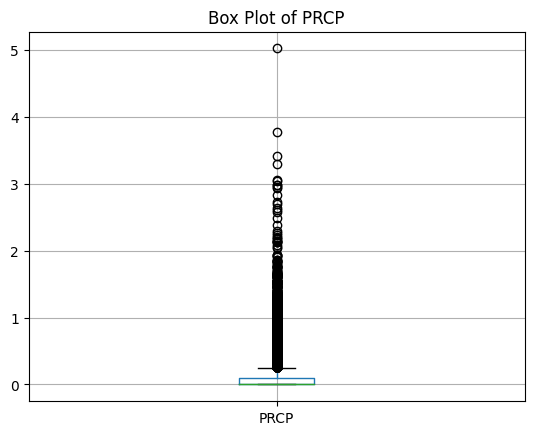

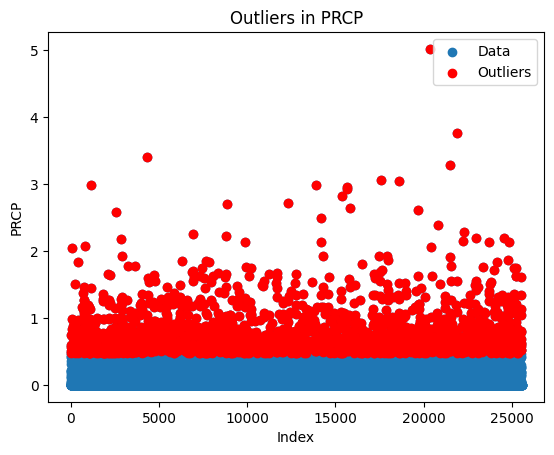

In [41]:
df.boxplot('PRCP')
plt.title('Box Plot of PRCP')
plt.show()


mean = df['PRCP'].mean()
std = df['PRCP'].std()
threshold = mean + 1.5 * std

outliers = df[df['PRCP'] > threshold]

plt.scatter(df.index, df['PRCP'], label='Data')
plt.scatter(outliers.index, outliers['PRCP'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('PRCP')
plt.title('Outliers in PRCP')
plt.legend()
plt.show()

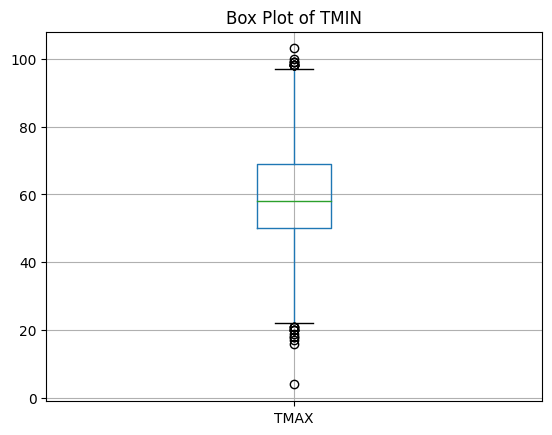

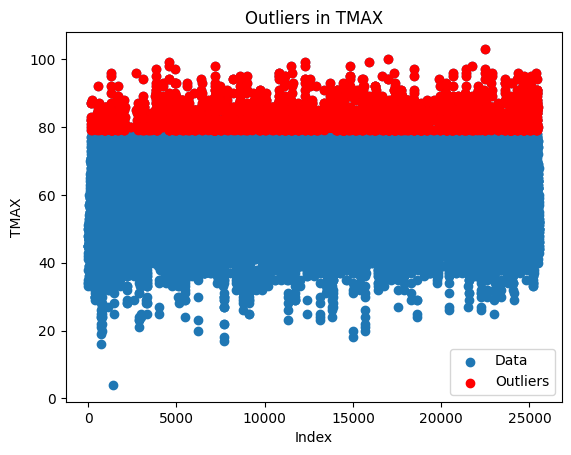

In [43]:
df.boxplot('TMAX')
plt.title('Box Plot of TMIN')
plt.show()


mean = df['TMAX'].mean()
std = df['TMAX'].std()
threshold = mean + 1.5 * std

outliers = df[df['TMAX'] > threshold]

plt.scatter(df.index, df['TMAX'], label='Data')
plt.scatter(outliers.index, outliers['TMAX'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('TMAX')
plt.title('Outliers in TMAX')
plt.legend()
plt.show()

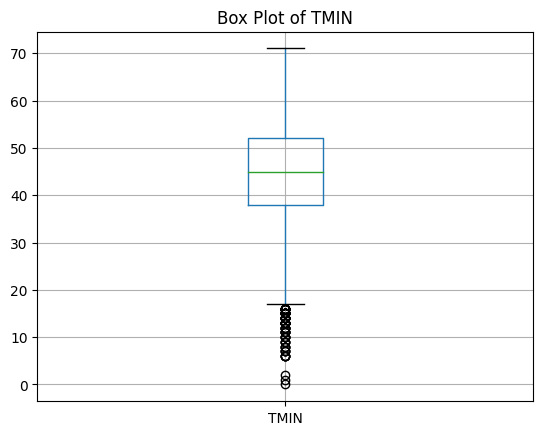

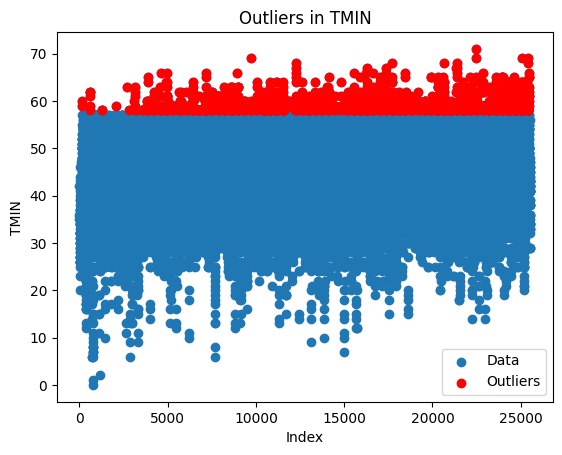

In [44]:
df.boxplot('TMIN')
plt.title('Box Plot of TMIN')
plt.show()


mean = df['TMIN'].mean()
std = df['TMIN'].std()
threshold = mean + 1.5 * std

outliers = df[df['TMIN'] > threshold]

plt.scatter(df.index, df['TMIN'], label='Data')
plt.scatter(outliers.index, outliers['TMIN'], color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('TMIN')
plt.title('Outliers in TMIN')
plt.legend()
plt.show()

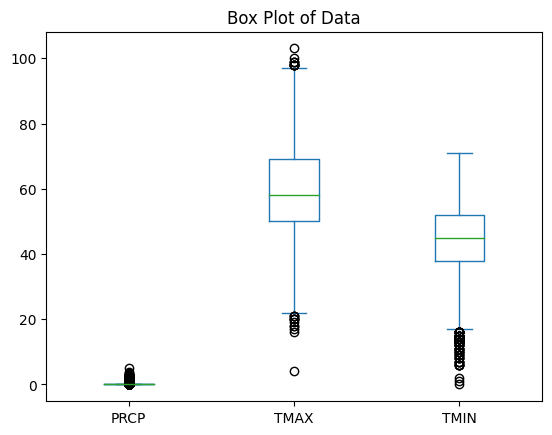

Lower Limit: PRCP    -0.15
TMAX    21.50
TMIN    17.00
dtype: float64
Upper Limit: PRCP     0.25
TMAX    97.50
TMIN    73.00
dtype: float64


In [45]:
columns= ['PRCP','TMAX','TMIN']

df[columns].plot(kind='box')
plt.title('Box Plot of Data')
plt.show()


q1 = df[columns].quantile(0.25)
q3 = df[columns].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)



In [46]:
df = df[(df[columns] >= lower_limit) & (df[columns] <= upper_limit)]

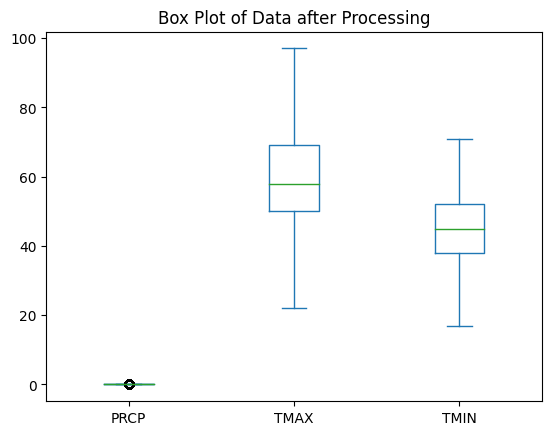

In [47]:
df[columns].plot(kind='box')
plt.title('Box Plot of Data after Processing')
plt.show()